In [108]:
# Author: Kai Zhang
# Stevens Intitute of Technology
#import pandas as pd

In [109]:
#data=pd.read_csv("news_train.csv",header=0)
#data.head()
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [110]:
# Author: Kai Zhang
# Stevens Institute of Technology

# import method for split train/test data set
from sklearn.model_selection import train_test_split

# import method to calculate metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn import svm
# import pipeline class
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# import GridSearch
from sklearn.model_selection import GridSearchCV

import pandas as pd


def classify (training_file, testing_file):
    data = pd.read_csv(training_file,header=0)
    text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', svm.LinearSVC())
                   ])
    parameters = {'tfidf__min_df':[1,2,5],
              'tfidf__stop_words':[None,"english"],
              'clf__C': [0.5,1,5]
    }
    # the metric used to select the best parameters
    metric =  "f1_macro"

    # GridSearch also uses cross validation
    gs_clf = GridSearchCV\
    (text_clf, param_grid=parameters, \
     scoring=metric, cv=6)
    
    gs_clf = gs_clf.fit(data["text"], data["label"])
    print("GridSearch results:")
    for param_name in gs_clf.best_params_:
        print(param_name,": ",gs_clf.best_params_[param_name])
    
    print("Using Grid Search, the best f1 score:\n", gs_clf.best_score_)
    
    # Using the best parameter values, train a linear support vector machine classifier with /
    # all samples in news_train.csv
    
    # initialize the TfidfVectorizer 

    tfidf_vect = TfidfVectorizer(min_df=gs_clf.best_params_['tfidf__min_df'],stop_words=gs_clf.best_params_['tfidf__stop_words']) 
    
    # generate tfidf matrix
    dtm= tfidf_vect.fit_transform(data["text"])
    
    # split dataset into train (100%) and test sets (0%)
    X_train, X_test, y_train, y_test = train_test_split(\
                dtm, data["label"], test_size=0.0, random_state=0)
    
    # train a SVM model using the train data
    clf = svm.LinearSVC(C=gs_clf.best_params_['clf__C']).fit(X_train, y_train)
    
    # predict the news group for the test dataset
    data_test = pd.read_csv(testing_file,header=0)
    dtm_test= tfidf_vect.transform(data_test["text"])
    predicted=clf.predict(dtm_test)

    # get the list of unique labels
    labels=sorted(data_test["label"].unique())
    
    # to get all performance metrics
    print('\n')
    print("Show all performance metrics")
    print(classification_report\
      (data_test["label"], predicted, target_names=labels))

    # compare
    print("Comments:")
    print("We have known that the best f1 score from grid search is 0.8753..., however, \
    f1-macro score obtained from the test dataset is 0.90 which is greater than previous one. Therefore,\
    the model is overfitted!")
    print('\n')

In [111]:
#data=pd.read_csv("news_train.csv",header=0)
#length=len(data)
#for i in range(0,length,300):
#    if i%300==0:
#        a=pd.read_csv("news_train.csv",header=0,nrows=i)
        #print(len(a))
    


In [112]:
def impact_of_sample_size(train_file, test_file):
    data=pd.read_csv(train_file,header=0)
    length=len(data)
    # store the information about evaluation on model
    size=[]
    precision_Bayes=[]
    recall_Bayes=[]
    precision_SVM=[]
    recall_SVM=[]
    for i in range(0,length,300):
        if i%300==0 and i!=0:
            size.append(i)
            train=pd.read_csv(train_file,header=0,nrows=i)
            # initialize the TfidfVectorizer with stop words removed
            tfidf_vect = TfidfVectorizer(stop_words="english")
            # generate tfidf matrix
            dtm= tfidf_vect.fit_transform(train["text"])
            # split dataset into train (100%) and test sets (0%)
            X_train, X_test, y_train, y_test = train_test_split(\
                        dtm, train["label"], test_size=0.0, random_state=0)
    
            # train a multinomial naive Bayes model using the training data
            clf = MultinomialNB().fit(X_train, y_train)
            # predict the news group for the test dataset
            data_test = pd.read_csv(test_file,header=0)
            dtm_test= tfidf_vect.transform(data_test["text"])
            # get the list of unique labels
            labels=sorted(data_test["label"].unique())
            predicted=clf.predict(dtm_test)
            # calculate performance metrics. 
            # Support is the number of occurrences of each label
            precision, recall, fscore, support=\
                precision_recall_fscore_support(\
            data_test["label"], predicted, labels=labels,average="macro")
            precision_Bayes.append(precision)
            recall_Bayes.append(recall)
    
            # train a SVM model
            clf = svm.LinearSVC().fit(X_train, y_train)
            # predict the news group for the test dataset
            predicted=clf.predict(dtm_test)
            # calculate performance metrics. 
            # Support is the number of occurrences of each label
            precision, recall, fscore, support=\
                precision_recall_fscore_support(\
                 data_test["label"], predicted, labels=labels,average="macro")
            precision_SVM.append(precision)
            recall_SVM.append(recall)
            
    train=data
    # initialize the TfidfVectorizer with stop words removed
    tfidf_vect = TfidfVectorizer(stop_words="english")
    # generate tfidf matrix
    dtm= tfidf_vect.fit_transform(train["text"])
    # split dataset into train (100%) and test sets (0%)
    X_train, X_test, y_train, y_test = train_test_split(\
                dtm, train["label"], test_size=0.0, random_state=0)

    # train a multinomial naive Bayes model using the training data
    clf = MultinomialNB().fit(X_train, y_train)
    # predict the news group for the test dataset
    data_test = pd.read_csv(test_file,header=0)
    dtm_test= tfidf_vect.transform(data_test["text"])
    # get the list of unique labels
    labels=sorted(data_test["label"].unique())
    predicted=clf.predict(dtm_test)
    # calculate performance metrics. 
    # Support is the number of occurrences of each label
    precision, recall, fscore, support=\
        precision_recall_fscore_support(\
    data_test["label"], predicted, labels=labels,average="macro")
    precision_Bayes.append(precision)
    recall_Bayes.append(recall)

    # train a SVM model
    clf = svm.LinearSVC().fit(X_train, y_train)
    # predict the news group for the test dataset
    predicted=clf.predict(dtm_test)
    # calculate performance metrics. 
    # Support is the number of occurrences of each label
    precision, recall, fscore, support=\
        precision_recall_fscore_support(\
         data_test["label"], predicted, labels=labels,average="macro")
    precision_SVM.append(precision)
    recall_SVM.append(recall)
#round_process(train_file,test_file)
    size.append(length)
    
    #draw a line chart
    plt.plot(size,precision_Bayes,'s-',color = 'r',label="multinomial Naive Bayes")
    plt.plot(size,precision_SVM,'o-',color = 'b',label="linear support vector machine")
    xlabel('Sample Size')
    ylabel('Precision')
    title('the relationship between sample size and precision')
    grid(True)
    show()
    
    plt.plot(size,recall_Bayes,'s-',color = 'r',label="multinomial Naive Bayes")
    plt.plot(size,recall_SVM,'o-',color = 'b',label="linear support vector machine")
    xlabel('Sample Size')
    ylabel('Recall')
    title('the relationship between sample size and recall')
    grid(True)
    show()

Test Q1: Classification
GridSearch results:
clf__C :  0.5
tfidf__min_df :  1
tfidf__stop_words :  english
Using Grid Search, the best f1 score:
 0.8753227874289731


Show all performance metrics
             precision    recall  f1-score   support

   Business       0.90      0.85      0.87       136
   Sci/Tech       0.87      0.89      0.88       130
     Sports       0.96      0.98      0.97       118
      World       0.89      0.91      0.90       116

avg / total       0.90      0.90      0.90       500



Comments:
We have known that the best f1 score from grid search is 0.8753..., however     f1-macro score obtained from the test dataset is 0.90 which is greater than previous one. Therefore    the model is overfitted!
Test Q2: Show the impact of sample size on classifier performance


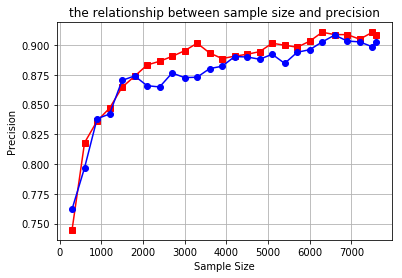

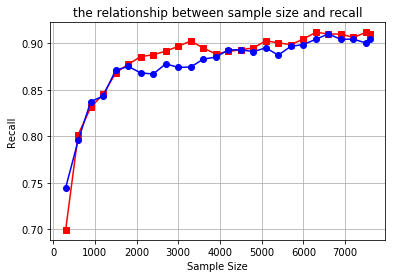

In [113]:
if __name__ == "__main__":
# Test Q1 Classification
    print("Test Q1: Classification")
    classify ("news_train.csv","news_test.csv")
    
# Test Q2 
    print("Test Q2: Show the impact of sample size on classifier performance")
    print("The red line shows the Bayes model's Perfomance, the blue one is SVM model. The interval of round is 300.")
    impact_of_sample_size("news_train.csv","news_test.csv")